In [1]:
import os
import pandas as pd

HOUSING_PATH = "C:/Users/Josh/Desktop/My_Docs/Datasets/housing.csv"

def load_housing_data(path=HOUSING_PATH):
    return pd.read_csv(path)

In [2]:
housing_data = load_housing_data()
housing_data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [3]:
# Pandas info() is used to get a quick description of the data and each column. Upon first glance we can see total_bedrooms has 207 missing values.
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# Pandas value_counts() can be used on categorical attributes to view value types.
housing_data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
# Pandas describe() provides info for each numerical attribute. Note that ocean_proximity has been ignored as it is not numeric.
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


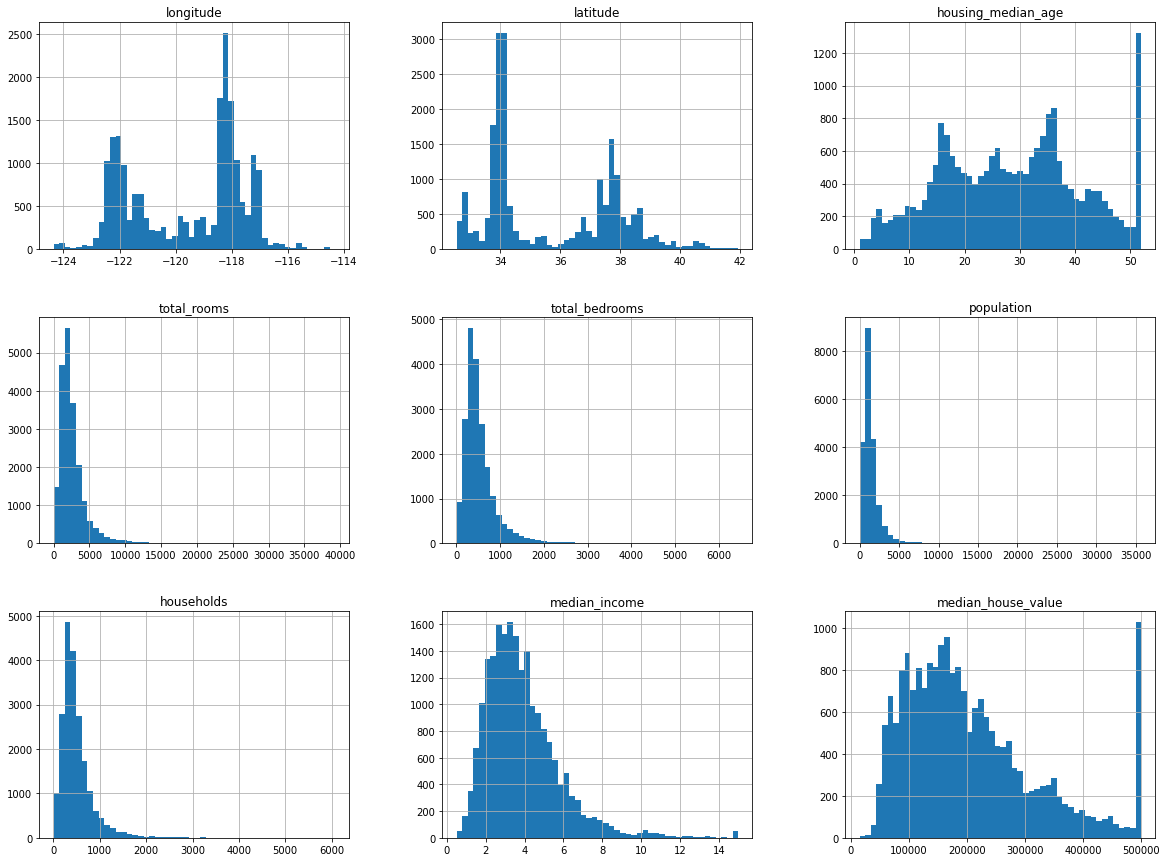

In [6]:
# Plotting a histogram for each numerical attribute to understand the data better using matplotlib.
%matplotlib inline
import matplotlib.pyplot as plt
housing_data.hist(bins=50, figsize=(20, 15))
plt.show()

In [7]:
# Conclusions
# - median_income has been scaled and capped at 15. Each number represents every 10,000. (8 = 80,000)
# - median_housing_age and median_house_value have also been capped. Decide if you should add more labels to collect data after the max value or remove data after the max value.
# - Each different attribute has different methods of scaling that should be addressed with feature scaling.
# - Most attributes are tail heavy and extend far to the right because of rare higher values, these can be addressed by scaling to have a more bell shaped distribution.

In [8]:
# Creating a test set (Do not analyze the test set to avoid risk of overfitting). The test set will be 20% of the total dataset.
# Create a function that returns a train set and a test set
# Although this function works you run the risk of using data from the test set after running it multiple times exposing it to the algorithm early
import numpy as np

def split_train_test(data, test_ratio):
    
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    train_indices = shuffled_indices[test_set_size:] # nums after 4128
    test_indices = shuffled_indices[:test_set_size] # nums before 4128
    
    return data.iloc[train_indices], data.iloc[test_indices]

train_data, test_data = split_train_test(housing_data, 0.20)

In [9]:
len(train_data)

16512

In [10]:
len(test_data)

4128

In [11]:
# A better method is to use a seed
# sklearns model_selection has a train_set_split method that splits train sets and test sets from the original data using a percentage test size and random state seed
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42)

In [12]:
# Creating a new category with pandas cut function
housing_data["income_cat"] = pd.cut(housing_data["median_income"], bins=[0, 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

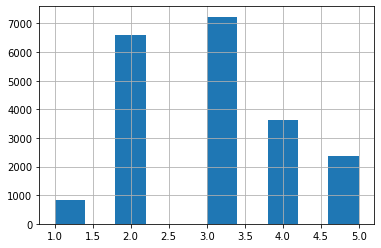

In [13]:
housing_data["income_cat"].hist()

In [14]:
# Splitting the train/test set by each income_category to better avoid bias

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing_data, housing_data["income_cat"]):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]

In [15]:
strat_test_set["income_cat"].value_counts()

3    1447
2    1316
4     728
5     472
1     165
Name: income_cat, dtype: int64

In [16]:
# Now removing the income_cat so the data is back to its original state, but it keeps its better shuffled order
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [17]:
# Test set generation complete, these methods create a closely unbiased test set to assist the machine learning algorithms generalize better later on.

In [18]:
housing_data = strat_train_set.copy()

<AxesSubplot:title={'center':'California Housing Prices'}, xlabel='longitude', ylabel='latitude'>

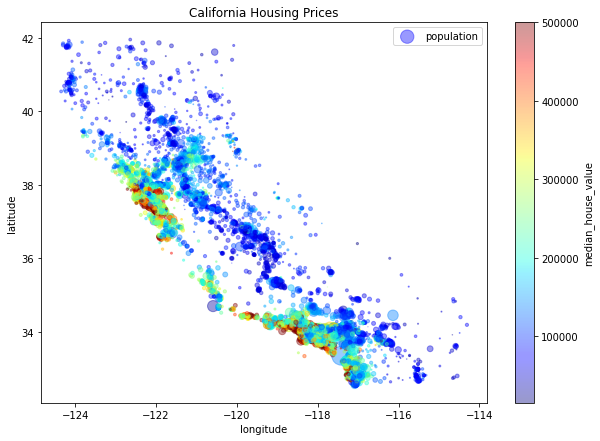

In [19]:
# Since the data holds geographical information, we can use a scatterplot to visualize the data
# Alpha allows us to identify areas with high density
fig, ax = plt.subplots()

housing_data.plot(title="California Housing Prices", kind="scatter", x="longitude", y="latitude", alpha=0.4, 
                  s=housing_data["population"]/100, label="population", figsize=(10, 7), c="median_house_value",
                  cmap=plt.get_cmap("jet"), colorbar=True, ax=ax)

In [20]:
# Using the standard correlation coefficient to check the correlation between attributes

corr_matrix = housing_data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

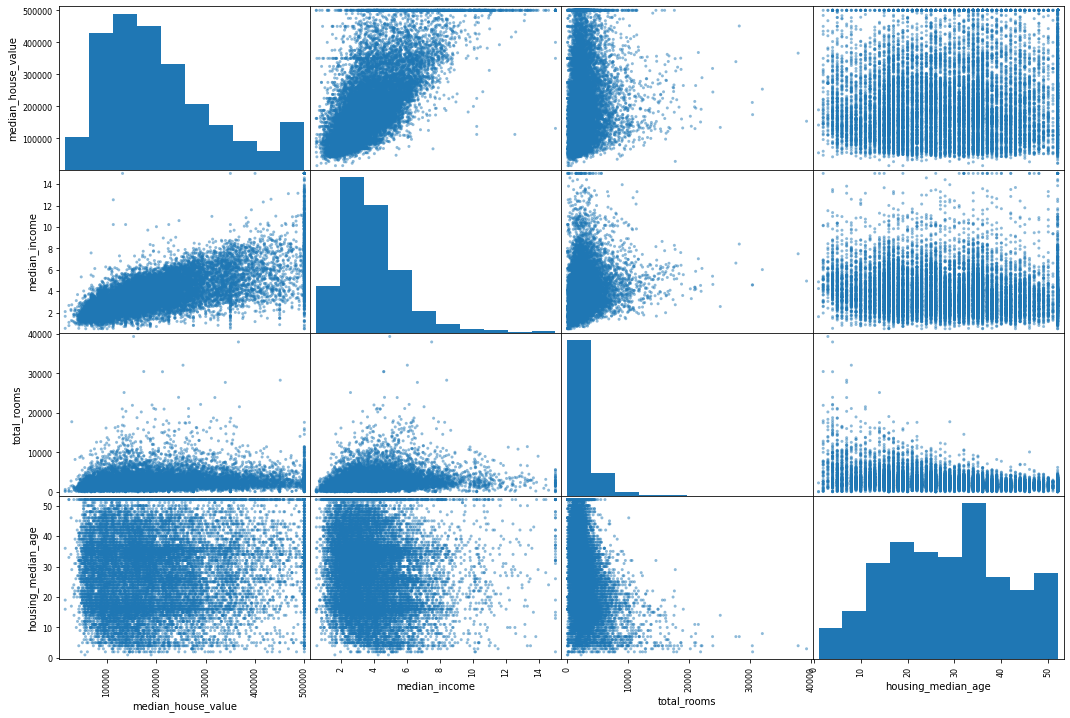

In [21]:
# Another way to check correlation is to use a scatter matrix to check the correlation between pairs of attributes in graph form
# The median_house_value vs median_income seem to have the highest most useful correlation based on the two methods
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing_data[attributes], figsize=(18,12))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

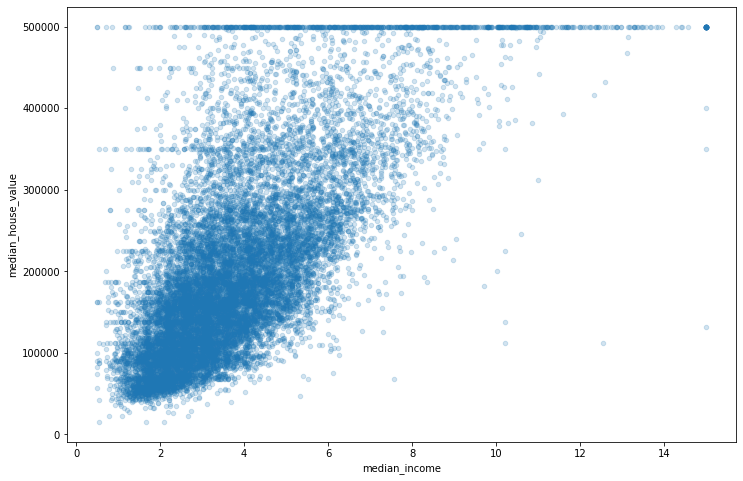

In [22]:
housing_data.plot(kind="scatter", x="median_income", y="median_house_value", alpha=.2, figsize=(12, 8))

In [23]:
# Experimenting with combined attributes to gain further insight and discover more correlations
housing_data["rooms_per_household"] = housing_data["total_rooms"]/housing_data["households"]
housing_data["bedrooms_per_room"] = housing_data["total_bedrooms"]/housing_data["total_rooms"]
housing_data["population_per_household"] = housing_data["population"]/housing_data["households"]

In [24]:
corr_matrix = housing_data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [25]:
# Now onto preparing the data for the machine learning algorithms
# Reverting to a clean dataset by copying the train set again and seperating the predictors and the labels
# This is to avoid making the same transformations to the predictors and the target values. drop() creates a copy of the data
housing_data = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [26]:
# Dealing with the missing values in total_bedrooms
# Use the median to fill missing data since there are not a lot of missing instances and median will generalize the best
# Save the median so it can be used for future missing values
# Use fillna() to fill missing values with the median value
median_bedrooms = housing_data["total_bedrooms"].median()
housing_data["total_bedrooms"].fillna(median_bedrooms, inplace=True)

In [27]:
# Using sklearn inputer to compute and replace all missing values for each attribute
# Imputers can only use numeric values so drop others
# Fit values to the imputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
housing_numeric = housing_data.drop("ocean_proximity", axis=1)

imputer.fit(housing_numeric)
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [28]:
# Now apply all values to the missing value of their respective attribute using the trained imputer
# The result of transform is a plain numpy array containing the transformed features
# Then create a new DataFrame using the housing_numeric attributes without the oceon_proximity attribute
X = imputer.transform(housing_numeric)
housing_transformed = pd.DataFrame(X, columns=housing_numeric.columns, index=housing_numeric.index)

In [29]:
# Next we handle the categorical attributes, oceon_proximity
# using [[attribute]] double square brackets gets the table element not just the values
housing_cats = housing_data[["ocean_proximity"]]

In [30]:
housing_cats.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [31]:
# Since machine learning algorithms prefer to work with numbers, it is best to conver the text categories to numeric
# The OrdinalEncoder class from sklearn is used to convert categories to numbers
# fit_transform is used to fit the data from the original data set and transform it with the new values
from sklearn.preprocessing import OrdinalEncoder

ord_encoder = OrdinalEncoder()
housing_cats_encoded = ord_encoder.fit_transform(housing_cats)
housing_cats_encoded

array([[1.],
       [4.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

In [32]:
# Values have been stored in the ordinal encoder class
ord_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [33]:
# An issue with the above solution is that some machine learning algorithms may assume numbers closer together are similar
# 1hot encoding is a way to solve this problem by creating a binary representation of each category (INLAND = [0, 1, 0, 0, 0])
# Only 1 attribute will be equal to 1 (hot), the rest will be 0 (cold)
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()
housing_cats_1hot = onehot_encoder.fit_transform(housing_cats)
housing_cats_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [34]:
# Convert the sparse matrix (2d array) into a NumPy array
housing_cats_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [35]:
onehot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]